<class 'numpy.memmap'>
(73000, 5)
['A man and woman bathe in a shallow river.'
 'A man and a woman in a river.' ''
 'A man and women in the river washing and eating.' '']
(9000, 3, 224, 224)
365000000
301056


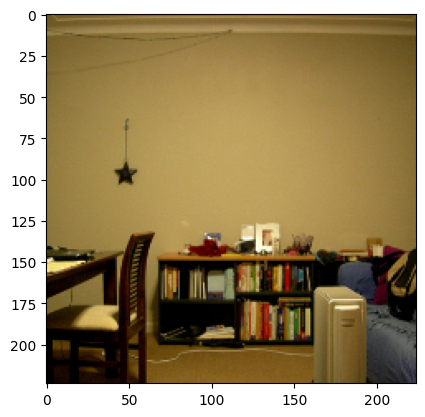

In [62]:
import numpy as np

# memory-mapped for large files
data = np.load('./data/dream_sub01/COCO_73k_annots_curated.npy', mmap_mode='r')
data2 = np.load('./data/dream_sub01/sub01_coco73k.npy', mmap_mode='r')
# data3 = np.load('./data/dream_sub01/sub01_coco73k.npy')  # normal load


print(type(data))
print(data.shape)       # see dimensions

# # peek at first element
print(data[12])  # (73, 224, 224)
# print(data2[0])
print(data2.shape)  # (3, 224, 224)

#print size in bytes
print(data.nbytes)
print(data2[0].nbytes)

import matplotlib.pyplot as plt

img = np.transpose(data2[0], (1, 2, 0))  # -> (224, 224, 3)

#change to float32 type
img = img.astype(np.float32)
# example if data[0] is an image array
plt.imshow(img)
plt.show()



Top-level keys in the HDF5 file:
images
voxels
Images shape: (27750, 256, 256, 3)
number of images: 27750


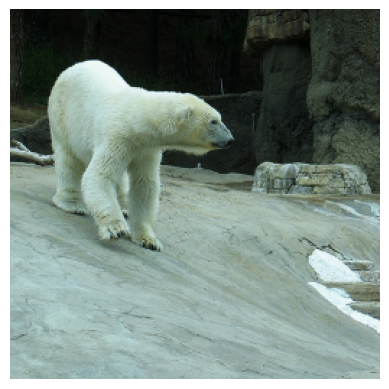

Voxels shape: (27750, 15724)
number of voxels: 27750
voxel one [205.728     61.88     503.36932  ... -60.814667 642.036    491.40668 ]


In [85]:
import h5py

# open the file in read-only mode
file_path = './data/dream_sub01/subj01_nsdgeneral.hdf5'
h5 = h5py.File(file_path, 'r')

# list all the top-level groups/datasets
print("Top-level keys in the HDF5 file:")
for key in h5.keys():
    print(key)

# pick a dataset to inspect (replace 'responses' with the dataset name you want)
dataset_name = 'responses'  # example, check the keys printed above
if dataset_name in h5:
    data = h5[dataset_name]
    print("\nDataset info:")
    print("Shape:", data.shape)
    print("Data type:", data.dtype)
    print("First element:", data[0])

import matplotlib.pyplot as plt
import cv2 as cv


# check the shape of the images dataset
images = h5['images']
print("Images shape:", images.shape)  # e.g., (N_images, H, W, C)
print("number of images:", len(images))

# print("image one", images[0])
# show the first image
img = images[258]  # assuming images are stored as (H, W, C)
# convert to uint8 if necessary
img = img.astype(np.uint8)
# display the image using matplotlib        

plt.imshow(img)
plt.axis('off')
plt.show()

voxels = h5['voxels']
print("Voxels shape:", voxels.shape)  # e.g., (N_images, N_voxels)
print("number of voxels:", len(voxels))
print("voxel one", voxels[1])# --- IGNORE ---


In [57]:
import os
from PIL import Image

# define output directory
output_dir = './data/nsddata_stimuli/test_images'


# Get the images dataset
images = h5['images']
print(f"Total images available: {images.shape[0]}")
print(f"Image shape: {images.shape[1:]}")

# Extract and save first 2000 images
num_images = min(2000, images.shape[0])
print(f"Extracting {num_images} images...")

for i in range(num_images):
    # Get image data
    img_data = images[i]
    
    # Convert to uint8 if necessary
    if img_data.dtype != np.uint8:
        img_data = img_data.astype(np.uint8)
    
    # Create PIL Image and save
    img = Image.fromarray(img_data)
    img.save(os.path.join(output_dir, f'image_{i:05d}.png'))
    
    # Progress update every 100 images
    if (i + 1) % 100 == 0:
        print(f"Saved {i + 1}/{num_images} images")

# Close the HDF5 file
h5.close()

print(f"Done! Saved {num_images} images to {output_dir}")

Total images available: 27750
Image shape: (256, 256, 3)
Extracting 2000 images...


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
from PIL import Image
import h5py
from multiprocessing import Pool, cpu_count

# ----------------------------
# Config
# ----------------------------
# open the file in read-only mode
file_path = './data/dream_sub01/subj01_nsdgeneral.hdf5'
h5 = h5py.File(file_path, 'r')
output_dir = './data/nsddata_stimuli/test_images_npy'
num_images_to_extract = 2000
save_as_npy = True  # save .npy file too for faster MiDaS processing

os.makedirs(output_dir, exist_ok=True)


images = h5['images']
num_images = min(num_images_to_extract, images.shape[0])
print(f"Total images available: {images.shape[0]}")
print(f"Extracting {num_images} images...")

# ----------------------------
# Function to save a single image
# ----------------------------
def save_image(idx):
    img_data = images[idx].astype(np.uint8)
    img = Image.fromarray(img_data)
    img.save(os.path.join(output_dir, f'image_{idx:05d}.png'))
    if (idx + 1) % 100 == 0:
        print(f"Saved {idx + 1}/{num_images} images")

# ----------------------------
# Multiprocessing
# ----------------------------
num_cores = max(1, cpu_count() - 1)  # leave one core free
with Pool(num_cores) as p:
    p.map(save_image, range(num_images))

print("All images saved as PNGs!")

# ----------------------------
# Optional: save as .npy
# ----------------------------
if save_as_npy:
    npy_path = os.path.join('./data/processed_depth_data', 'test_images.npy')
    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
    np.save(npy_path, images[:num_images].astype(np.uint8))
    print(f"Saved all images as .npy to {npy_path}")

# Close HDF5
h5.close()


Total images available: 27750
Extracting 2000 images...


Process SpawnPoolWorker-2:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-4:
Process SpawnPoolWorker-7:
Process SpawnPoolWorker-6:
Process SpawnPoolWorker-1:
Process SpawnPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/queues.py", li

KeyboardInterrupt: 

In [29]:
import h5py
import os

# Paths
original_h5 = './data/dream_sub01/subj01_nsdgeneral.hdf5'
subset_h5 = './data/nsddata_stimuli/subset_300_images.hdf5'
num_entries = 300  # first 300 images/voxels

# Ensure output folder exists
os.makedirs(os.path.dirname(subset_h5), exist_ok=True)

# Open original HDF5 and create subset
with h5py.File(original_h5, 'r') as h5_in:
    with h5py.File(subset_h5, 'w') as h5_out:
        for key in h5_in.keys():
            data = h5_in[key]
            # Only take the first `num_entries` along the first dimension
            subset_data = data[:num_entries]
            h5_out.create_dataset(key, data=subset_data, dtype=data.dtype)

print(f"Subset saved: first {num_entries} entries of all keys → {subset_h5}")


Subset saved: first 300 entries of all keys → ./data/nsddata_stimuli/subset_300_images.hdf5


In [ ]:
# taking depth pngs and splitting them into train and test numpy arrays with [N, H, W, 3] shape
import os
import numpy as np
from PIL import Image

# Paths
image_folder = 'data/depth_images/depth_maps_300'  # your folder with PNGs
train_outfile = 'data/processed_depth_data/subj01/nsd_train_stim_sub1.npy'
test_outfile = 'data/processed_depth_data/subj01/nsd_test_stim_sub1.npy'

# Get all PNG files sorted
image_files = sorted([os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.png')])

# Split: first 250 for train, last 50 for test
train_files = image_files[:250]
test_files = image_files[250:]

def load_images(file_list, resize=(64,64)):
    images = []
    for f in file_list:
        img = Image.open(f).convert("L")          # grayscale/depth
        img = img.resize(resize)
        img_array = np.array(img, dtype=np.uint8)  # [H, W]
        img_array = np.stack([img_array]*3, axis=-1)  # [H, W, 3]
        images.append(img_array)
    return np.array(images)                        # [N, H, W, 3]
                          # [N,3,H,W]

# Convert to numpy arrays
train_images = load_images(train_files)
test_images = load_images(test_files)

# Save
np.save(train_outfile, train_images)
np.save(test_outfile, test_images)

print(f"Saved {train_images.shape[0]} train images with shape {train_images.shape} to {train_outfile}")
print(f"Saved {test_images.shape[0]} test images with shape {test_images.shape} to {test_outfile}")


Saved 250 train images with shape (250, 64, 64, 3) to data/processed_depth_data/subj01/nsd_train_stim_sub1.npy
Saved 50 test images with shape (50, 64, 64, 3) to data/processed_depth_data/subj01/nsd_test_stim_sub1.npy


In [51]:
data3 = np.load('data/processed_depth_data/subj01/nsd_test_stim_sub1.npy', mmap_mode='r')

print(type(data3))
print(data3.shape)       # see dimensions

<class 'numpy.memmap'>
(50, 64, 64, 3)


In [ ]:
# voxel preparing

import h5py
import numpy as np

# Paths
file_path = './data/dream_sub01/subj01_nsdgeneral.hdf5'
train_outfile = 'data/processed_depth_data/subj01/nsd_train_fmriavg_nsdgeneral_sub1.npy'
test_outfile  = 'data/processed_depth_data/subj01/nsd_test_fmriavg_nsdgeneral_sub1.npy'

# Load fMRI data from HDF5
with h5py.File(file_path, 'r') as f:
    voxels = f['voxels'][:]    # Load into memory
    print("Original voxel shape:", voxels.shape)

# Example: First 250 for train, next 50 for test (to match your image split)
num_train = 250
num_test = 50
fmri_train = voxels[:num_train, :]                   # [250, num_voxel]
fmri_test  = voxels[num_train:num_train+num_test, :] # [50, num_voxel]

# Save
np.save(train_outfile, fmri_train)
np.save(test_outfile, fmri_test)

print(f"Saved train fMRI: {fmri_train.shape} -> {train_outfile}")
print(f"Saved test  fMRI: {fmri_test.shape}  -> {test_outfile}")


Original voxel shape: (27750, 15724)
Saved train fMRI: (250, 15724) -> data/processed_depth_data/subj01/nsd_train_fmriavg_nsdgeneral_sub1.npy
Saved test  fMRI: (50, 15724)  -> data/processed_depth_data/subj01/nsd_test_fmriavg_nsdgeneral_sub1.npy


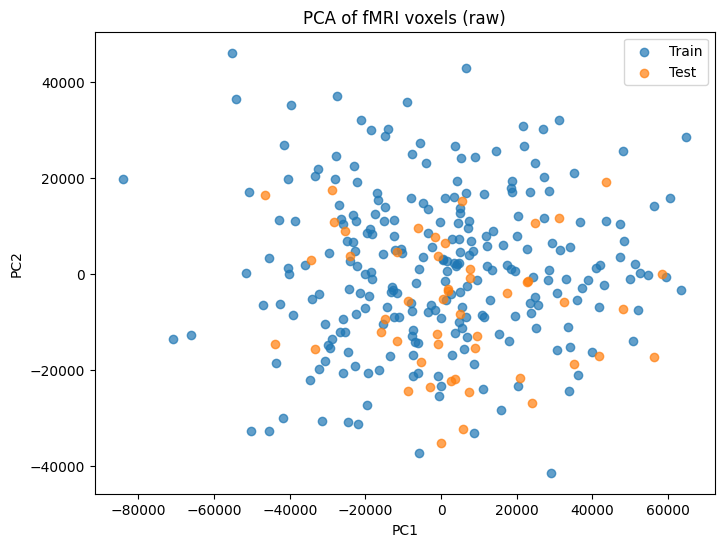

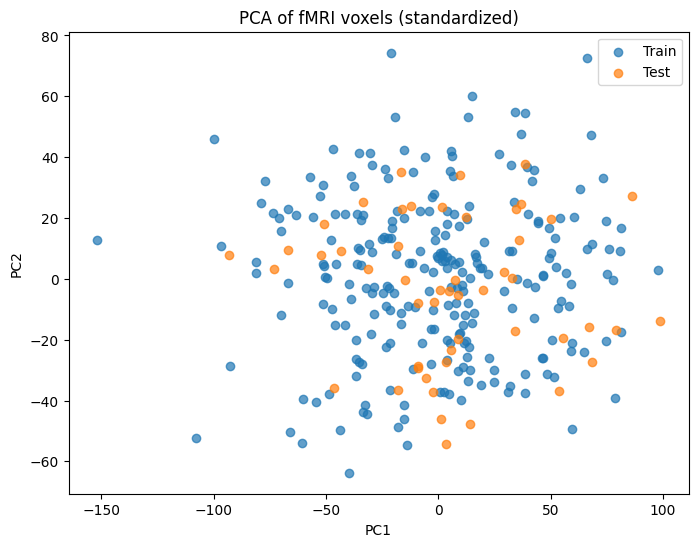

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your saved data
fmri_train = np.load('data/processed_depth_data/subj01/nsd_train_fmriavg_nsdgeneral_sub1.npy')
fmri_test  = np.load('data/processed_depth_data/subj01/nsd_test_fmriavg_nsdgeneral_sub1.npy')

# Combine for visualization (optional)
all_data = np.vstack([fmri_train, fmri_test])
labels = np.array([0]*fmri_train.shape[0] + [1]*fmri_test.shape[0])  # 0=train, 1=test

# 1️⃣ Visualize raw data with PCA
pca = PCA(n_components=2)
all_data_pca = pca.fit_transform(all_data)

plt.figure(figsize=(8,6))
plt.scatter(all_data_pca[labels==0,0], all_data_pca[labels==0,1], label='Train', alpha=0.7)
plt.scatter(all_data_pca[labels==1,0], all_data_pca[labels==1,1], label='Test', alpha=0.7)
plt.title("PCA of fMRI voxels (raw)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# 2️⃣ Standardize the data (z-score)
scaler = StandardScaler()
all_data_std = scaler.fit_transform(all_data)

# Visualize standardized data with PCA
all_data_std_pca = pca.fit_transform(all_data_std)  # you can refit PCA after standardization

plt.figure(figsize=(8,6))
plt.scatter(all_data_std_pca[labels==0,0], all_data_std_pca[labels==0,1], label='Train', alpha=0.7)
plt.scatter(all_data_std_pca[labels==1,0], all_data_std_pca[labels==1,1], label='Test', alpha=0.7)
plt.title("PCA of fMRI voxels (standardized)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


In [53]:
%ls

DREAM/          brain-diffuser/ data/           inspect.ipynb


In [67]:
import numpy as np

# Load the .npy file
file_path = 'data/dream_sub01/subj01_annot.npy'
data = np.load(file_path, mmap_mode='r')  # memory-mapped for large files

# Check the type and shape of the data
print("Data type:", type(data))
print("Data shape:", data.shape)

# Peek at the first element
print("First element:", data[0])  # Adjust index as needed based on data structure

# Print size in bytes
print("Size in bytes:", data.nbytes)



ValueError: Array can't be memory-mapped: Python objects in dtype.

In [79]:
import numpy as np

# Load the .npy file without memory mapping
file_path = './data/dream_sub01/subj01_annot.npy'
data = np.load(file_path, allow_pickle=True)  # allow_pickle=True to load object arrays

# Check the type and shape of the data
print("Data type:", type(data))
print("Data shape:", data.shape)
print("length of each data:", len(data[2]))

# Peek at the first element
print("First element:", data[250])  # Adjust index as needed based on data structure

# Print size in bytes
print("Size in bytes:", data.nbytes)

Data type: <class 'numpy.ndarray'>
Data shape: (27750,)
length of each data: 5
First element: ['Several motor bikes going down a city road.', 'Several motorcyclists driving down a road on a sunny day.', 'First person view of several motorcycles driving down a paved road.', 'a motorcycle driving down a high way with others', 'a few people riding motorcycles on a raod']
Size in bytes: 222000


In [73]:
import numpy as np
import os

# Load full annotations (shape: (27750,))
annots = np.load('./data/dream_sub01/subj01_annot.npy', allow_pickle=True)

# Define number of train and test samples
num_train = 250
num_test = 50
sub = 1

# Slice annotations
train_caps = np.vstack(annots[:num_train])  # shape (250, 5)
test_caps = np.vstack(annots[num_train:num_train+num_test])  # shape (50, 5)

# Save to the same file name format as the repo
np.save(f'data/annotations/nsd_train_cap_sub{sub}.npy', train_caps)
np.save(f'data/annotations/nsd_test_cap_sub{sub}.npy', test_caps)

print("Train captions shape:", train_caps.shape)
print("Test captions shape:", test_caps.shape)
print("Caption data are saved.")


Train captions shape: (250, 5)
Test captions shape: (50, 5)
Caption data are saved.


In [74]:
import h5py
import numpy as np

# Paths
hdf5_file_path = './data/nsddata_stimuli/subset_300_images.hdf5'
train_outfile = './data/processed_depth_data/nsd_train_stim_coloured_sub1.npy'
test_outfile = './data/processed_depth_data/nsd_test_stim_coloured_sub1.npy'

# Open the HDF5 file in read-only mode
with h5py.File(hdf5_file_path, 'r') as h5:
    # Assuming the images are stored under the key 'images'
    images = h5['images'][:]  # Load all images into memory
    print("Loaded images shape:", images.shape)  # Check the shape

# Split: first 250 for train, last 50 for test
train_images = images[:250]  # [250, H, W, C]
test_images = images[250:300]  # [50, H, W, C]

# Save to .npy files
np.save(train_outfile, train_images)
np.save(test_outfile, test_images)

print(f"Saved train images with shape {train_images.shape} to {train_outfile}")
print(f"Saved test images with shape {test_images.shape} to {test_outfile}")

Loaded images shape: (300, 256, 256, 3)
Saved train images with shape (250, 256, 256, 3) to ./data/processed_depth_data/nsd_train_stim_coloured_sub1.npy
Saved test images with shape (50, 256, 256, 3) to ./data/processed_depth_data/nsd_test_stim_coloured_sub1.npy
